# The Music of the Sphere: Fourier Series Representation of the Horizon-scale Potential

*Phil Marshall and Roger Blandford, August 2015*

In this notebook we look at some simulated potential fields, and predict the CMB temperature map from them.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import beatbox
import healpy as hp
import numpy as np

/Users/pjm/lsst/DarwinX86/anaconda/2.1.0-4-g35ca374/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


## 1. Generating and Visualizing a 3D Potential

Our plan is to use a simple Fourier series, with terms lying within some sphere in k-space, to represent the potential on horizon scales. Let's instantiate such a "beatbox" universe and generate a Gaussian random potential field in it.

In [3]:
We = beatbox.Universe()
We.generate_a_random_potential_field(nmax=6)

Generated  924  potential Fourier coefficients
 Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 31.0


Now, let's visualize the 3D potentials, with `yt`. We're trying to make a plot like [this one](http://yt-project.org/doc/_images/vr_sample.jpg), as shown in the [volume rendering tutorial](http://yt-project.org/doc/visualizing/volume_rendering.html). [This `gist` (from Sam Skillman)](https://gist.github.com/samskillman/0e574d1a4f67d3a3b1b1) uses a development version of `yt` to do the rendering, but does show how to use `yt` data structures.

In [4]:
# !pip install --upgrade Cython
# !pip install --upgrade yt

In [5]:
import yt 

# yt.visualization.color_maps.show_colormaps()

yt : [INFO     ] 2015-10-15 10:28:45,696 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:28:45,697 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:28:45,698 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:28:45,699 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:28:45,700 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:28:45,768 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:28:45,769 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:28:45,770 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:28:45,771 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:28:45,772 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:28:45,774 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:28:45,775 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:28:45,7

Extrema of ds phi: 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321


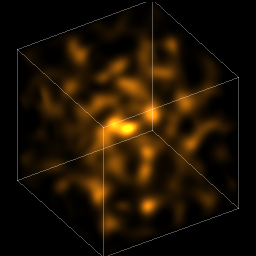

In [6]:
We.show_potential_with_yt(output='test.png',angle=1.0)

from IPython.display import Image
Image('test.png',width=600)

Hmm - I don't see too many layers! The code that makes this plot is here:

In [7]:
# %load -n We.show_potential_with_yt
# %load universe.py

We can also make a movie to show multiple angles:

In [8]:
# !pip install --upgrade images2gif
# !pip install --upgrade PIL

In [9]:
We.show_potential_from_all_angles_with_yt(output='phi.gif')

yt : [INFO     ] 2015-10-15 10:28:46,916 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:28:46,916 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:28:46,918 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:28:46,920 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:28:46,922 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:28:47,083 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:28:47,084 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:28:47,085 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:28:47,086 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:28:47,088 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:28:47,090 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:28:47,092 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:28:47,0

Making frame 0 :  frames/000.png at viewing angle 0.0
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:28:47,371 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:28:48,052 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:28:48,053 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:28:48,055 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:28:48,056 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:28:48,058 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:28:48,122 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:28:48,123 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:28:48,124 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:28:48,126 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:28:48,128 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:28:48,131 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:28:48,133 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:28:48,1

 1 :  frames/001.png at viewing angle 0.174532925199
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:28:48,318 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:28:48,878 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:28:48,878 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:28:48,879 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:28:48,880 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:28:48,881 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:28:48,929 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:28:48,930 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:28:48,930 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:28:48,931 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:28:48,932 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:28:48,934 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:28:48,935 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:28:48,9

 2 :  frames/002.png at viewing angle 0.349065850399
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:28:49,095 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:28:49,762 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:28:49,762 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:28:49,763 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:28:49,764 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:28:49,765 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:28:49,812 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:28:49,813 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:28:49,814 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:28:49,815 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:28:49,819 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:28:49,820 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:28:49,821 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:28:49,8

 3 :  frames/003.png at viewing angle 0.523598775598
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:28:49,946 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:28:50,657 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:28:50,658 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:28:50,659 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:28:50,660 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:28:50,661 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:28:50,726 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:28:50,727 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:28:50,727 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:28:50,728 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:28:50,730 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:28:50,731 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:28:50,733 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:28:50,7

 4 :  frames/004.png at viewing angle 0.698131700798
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:28:50,898 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:28:51,669 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:28:51,670 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:28:51,672 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:28:51,675 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:28:51,676 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:28:51,730 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:28:51,731 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:28:51,731 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:28:51,732 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:28:51,733 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:28:51,735 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:28:51,736 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:28:51,7

 5 :  frames/005.png at viewing angle 0.872664625997
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:28:51,873 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:28:52,655 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:28:52,656 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:28:52,658 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:28:52,659 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:28:52,662 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:28:52,724 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:28:52,725 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:28:52,725 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:28:52,726 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:28:52,728 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:28:52,735 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:28:52,737 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:28:52,7

 6 :  frames/006.png at viewing angle 1.0471975512
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:28:52,942 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:28:53,657 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:28:53,658 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:28:53,659 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:28:53,660 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:28:53,662 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:28:53,721 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:28:53,722 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:28:53,722 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:28:53,723 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:28:53,725 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:28:53,726 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:28:53,727 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:28:53,7

 7 :  frames/007.png at viewing angle 1.2217304764
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:28:53,945 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:28:54,653 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:28:54,654 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:28:54,654 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:28:54,657 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:28:54,658 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:28:54,712 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:28:54,713 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:28:54,713 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:28:54,714 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:28:54,715 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:28:54,717 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:28:54,718 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:28:54,7

 8 :  frames/008.png at viewing angle 1.3962634016
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:28:54,894 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:28:55,588 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:28:55,589 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:28:55,589 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:28:55,591 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:28:55,593 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:28:55,639 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:28:55,639 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:28:55,640 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:28:55,641 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:28:55,642 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:28:55,644 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:28:55,645 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:28:55,6

 9 :  frames/009.png at viewing angle 1.57079632679
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:28:55,841 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:28:56,489 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:28:56,490 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:28:56,490 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:28:56,492 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:28:56,493 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:28:56,549 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:28:56,550 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:28:56,550 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:28:56,551 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:28:56,553 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:28:56,555 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:28:56,556 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:28:56,5

 10 :  frames/010.png at viewing angle 1.74532925199
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:28:56,687 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:28:57,338 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:28:57,339 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:28:57,340 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:28:57,341 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:28:57,342 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:28:57,401 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:28:57,401 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:28:57,402 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:28:57,403 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:28:57,404 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:28:57,407 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:28:57,408 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:28:57,4

 11 :  frames/011.png at viewing angle 1.91986217719
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:28:57,610 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:28:58,326 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:28:58,327 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:28:58,329 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:28:58,331 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:28:58,332 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:28:58,391 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:28:58,391 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:28:58,393 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:28:58,394 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:28:58,397 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:28:58,399 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:28:58,400 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:28:58,4

 12 :  frames/012.png at viewing angle 2.09439510239
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:28:58,598 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:28:59,224 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:28:59,225 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:28:59,226 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:28:59,227 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:28:59,228 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:28:59,277 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:28:59,278 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:28:59,279 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:28:59,280 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:28:59,282 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:28:59,284 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:28:59,284 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:28:59,2

 13 :  frames/013.png at viewing angle 2.26892802759
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:28:59,419 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:29:00,027 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:29:00,027 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:29:00,028 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:29:00,030 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:29:00,031 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:29:00,083 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:29:00,084 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:29:00,085 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:29:00,086 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:29:00,089 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:29:00,091 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:29:00,092 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:29:00,0

 14 :  frames/014.png at viewing angle 2.44346095279
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:29:00,250 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:29:01,066 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:29:01,066 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:29:01,067 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:29:01,068 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:29:01,069 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:29:01,123 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:29:01,124 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:29:01,124 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:29:01,125 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:29:01,126 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:29:01,128 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:29:01,129 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:29:01,1

 15 :  frames/015.png at viewing angle 2.61799387799
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:29:01,278 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:29:02,079 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:29:02,080 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:29:02,080 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:29:02,081 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:29:02,083 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:29:02,137 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:29:02,138 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:29:02,140 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:29:02,141 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:29:02,143 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:29:02,144 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:29:02,145 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:29:02,1

 16 :  frames/016.png at viewing angle 2.79252680319
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:29:02,375 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:29:03,193 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:29:03,193 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:29:03,195 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:29:03,196 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:29:03,197 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:29:03,266 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:29:03,266 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:29:03,267 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:29:03,267 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:29:03,268 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:29:03,268 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:29:03,270 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:29:03,2

 17 :  frames/017.png at viewing angle 2.96705972839
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:29:03,507 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:29:04,312 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:29:04,312 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:29:04,314 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:29:04,315 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:29:04,316 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:29:04,390 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:29:04,391 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:29:04,392 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:29:04,393 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:29:04,396 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:29:04,580 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:29:04,581 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:29:04,5

 18 :  frames/018.png at viewing angle 3.14159265359
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:29:04,806 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:29:05,529 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:29:05,530 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:29:05,531 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:29:05,532 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:29:05,533 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:29:05,611 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:29:05,612 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:29:05,614 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:29:05,615 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:29:05,616 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:29:05,620 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:29:05,621 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:29:05,6

 19 :  frames/019.png at viewing angle 3.31612557879
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:29:05,883 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:29:06,570 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:29:06,570 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:29:06,571 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:29:06,572 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:29:06,573 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:29:06,627 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:29:06,628 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:29:06,628 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:29:06,630 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:29:06,632 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:29:06,634 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:29:06,635 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:29:06,6

 20 :  frames/020.png at viewing angle 3.49065850399
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:29:06,810 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:29:07,686 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:29:07,687 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:29:07,688 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:29:07,689 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:29:07,692 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:29:07,755 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:29:07,756 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:29:07,757 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:29:07,757 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:29:07,759 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:29:07,761 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:29:07,762 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:29:07,7

 21 :  frames/021.png at viewing angle 3.66519142919
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:29:08,028 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:29:08,892 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:29:08,893 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:29:08,894 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:29:08,895 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:29:08,897 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:29:08,952 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:29:08,953 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:29:08,954 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:29:08,955 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:29:08,957 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:29:08,959 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:29:08,960 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:29:08,9

 22 :  frames/022.png at viewing angle 3.83972435439
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:29:09,204 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:29:10,101 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:29:10,102 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:29:10,102 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:29:10,104 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:29:10,105 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:29:10,160 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:29:10,161 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:29:10,162 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:29:10,163 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:29:10,164 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:29:10,166 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:29:10,167 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:29:10,1

 23 :  frames/023.png at viewing angle 4.01425727959
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:29:10,397 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:29:11,282 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:29:11,283 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:29:11,283 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:29:11,284 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:29:11,285 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:29:11,342 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:29:11,343 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:29:11,343 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:29:11,344 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:29:11,346 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:29:11,348 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:29:11,349 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:29:11,3

 24 :  frames/024.png at viewing angle 4.18879020479
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:29:11,494 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:29:12,197 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:29:12,199 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:29:12,200 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:29:12,202 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:29:12,204 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:29:12,288 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:29:12,289 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:29:12,290 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:29:12,290 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:29:12,292 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:29:12,294 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:29:12,295 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:29:12,2

 25 :  frames/025.png at viewing angle 4.36332312999
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:29:12,540 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:29:13,412 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:29:13,413 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:29:13,414 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:29:13,415 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:29:13,416 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:29:13,485 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:29:13,486 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:29:13,487 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:29:13,488 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:29:13,490 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:29:13,492 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:29:13,494 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:29:13,4

 26 :  frames/026.png at viewing angle 4.53785605519
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:29:13,749 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:29:14,550 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:29:14,550 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:29:14,551 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:29:14,552 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:29:14,554 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:29:14,629 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:29:14,630 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:29:14,631 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:29:14,633 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:29:14,634 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:29:14,639 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:29:14,641 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:29:14,6

 27 :  frames/027.png at viewing angle 4.71238898038
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:29:14,928 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:29:15,710 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:29:15,710 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:29:15,712 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:29:15,713 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:29:15,714 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:29:15,789 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:29:15,790 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:29:15,791 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:29:15,792 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:29:15,794 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:29:15,797 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:29:15,800 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:29:15,8

 28 :  frames/028.png at viewing angle 4.88692190558
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:29:16,071 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:29:16,751 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:29:16,751 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:29:16,752 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:29:16,753 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:29:16,754 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:29:16,812 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:29:16,812 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:29:16,813 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:29:16,814 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:29:16,815 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:29:16,817 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:29:16,818 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:29:16,8

 29 :  frames/029.png at viewing angle 5.06145483078
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:29:16,976 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:29:17,781 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:29:17,782 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:29:17,783 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:29:17,785 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:29:17,786 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:29:17,861 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:29:17,863 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:29:17,865 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:29:17,866 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:29:17,867 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:29:17,869 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:29:17,871 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:29:17,8

 30 :  frames/030.png at viewing angle 5.23598775598
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:29:18,054 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:29:18,770 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:29:18,770 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:29:18,771 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:29:18,772 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:29:18,774 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:29:18,825 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:29:18,827 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:29:18,827 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:29:18,828 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:29:18,829 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:29:18,832 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:29:18,833 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:29:18,8

 31 :  frames/031.png at viewing angle 5.41052068118
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:29:18,993 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:29:19,655 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:29:19,655 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:29:19,656 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:29:19,657 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:29:19,658 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:29:19,710 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:29:19,711 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:29:19,711 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:29:19,712 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:29:19,713 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:29:19,715 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:29:19,716 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:29:19,7

 32 :  frames/032.png at viewing angle 5.58505360638
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:29:19,869 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:29:20,622 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:29:20,622 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:29:20,624 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:29:20,625 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:29:20,626 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:29:20,704 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:29:20,705 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:29:20,706 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:29:20,706 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:29:20,708 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:29:20,710 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:29:20,712 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:29:20,7

 33 :  frames/033.png at viewing angle 5.75958653158
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:29:20,972 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:29:21,698 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:29:21,698 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:29:21,699 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:29:21,701 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:29:21,702 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:29:21,764 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:29:21,765 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:29:21,766 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:29:21,766 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:29:21,767 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:29:21,770 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:29:21,771 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:29:21,7

 34 :  frames/034.png at viewing angle 5.93411945678
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:29:21,959 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321
Making frame

yt : [INFO     ] 2015-10-15 10:29:22,848 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-15 10:29:22,849 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-10-15 10:29:22,850 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-15 10:29:22,851 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-10-15 10:29:22,853 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-15 10:29:22,926 Loading field plugins.
yt : [INFO     ] 2015-10-15 10:29:22,928 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-15 10:29:22,931 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-15 10:29:22,932 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-15 10:29:22,934 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-10-15 10:29:22,937 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-10-15 10:29:22,938 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-10-15 10:29:22,9

 35 :  frames/035.png at viewing angle 6.10865238198
Extrema of ds phi:

yt : [INFO     ] 2015-10-15 10:29:23,171 Warning: no_ghost is currently True (default). This may lead to artifacts at grid boundaries.


 0.0 dimensionless 263.360652785 dimensionless
Extrema after symmetrizing: 0.0 282.169806321


In [16]:
Image(url='phi.gif',width=300)

## 2. Verifying that Phil's Python agrees with Roger's Mathematica code

This is [issue 8](https://github.com/rogerblandford/Music/issues/8).

Now, convert the Fourier coefficients `fn` into `alm`'s, using the appropriate response matrix.

In [11]:
# We.transform_3D_potential_fourier_series_into_T_spherical_harmonics(lmax=3)
# We.show_CMB_T_map(from_perspective_of="observer")